# Bayesian statistics in practice: distributions of sums
Beata Sirowy

Based on: Downey, A. (2021) _Think Bayes_

- We’ll start with a Forward Problem, where we are given the inputs
and compute the distribution of the output. 

- Then we’ll work on Inverse
Problems, where we are given the outputs and we compute the distribution of the
inputs.

## Dice

Suppose you roll two dice and add them up. 
- What is the
distribution of the sum? 
We’ll use the following function to create a Pmf that
represents the possible outcomes of a die:

In [37]:
import numpy as np
from empiricaldist import Pmf

def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

In [38]:
die = make_die(6)
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


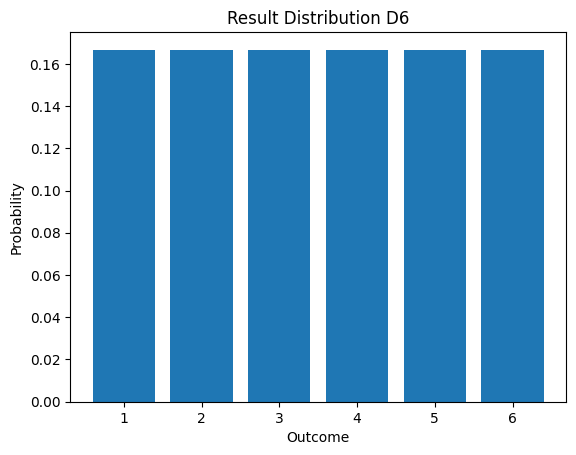

In [60]:

import matplotlib.pyplot as plt

sides = 6
die = make_die(sides)
outcomes = np.arange(1, sides+1)

plt.bar(outcomes, die) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution D6') 


plt.show()

If we roll two dice and add them up, there are 11 possible outcomes, 2 through
12, but they are not equally likely. To compute the distribution of the sum, we
have to enumerate the possible outcomes.

In [61]:
def add_dist(pmf1, pmf2): #Compute the distribution of a sum
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            if q in res:
                res[q] += p
            else:
                res[q] = p
    return res

- The parameters are Pmf objects representing distributions.
- The loops iterate though the quantities and probabilities in the Pmf objects. Each
time through the loop q gets the sum of a pair of quantities, and p gets the
probability of the pair. 
- Because the same sum might appear more than once, we
have to add up the total probability for each sum.

In [62]:
outcomes = np.arange(2, sides1 + sides2 + 1)

sides1 = 6
sides2 = 6

die1 = make_die(sides1)
die2 = make_die(sides2)

dice = add_dist(die1, die2) 

dice


,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


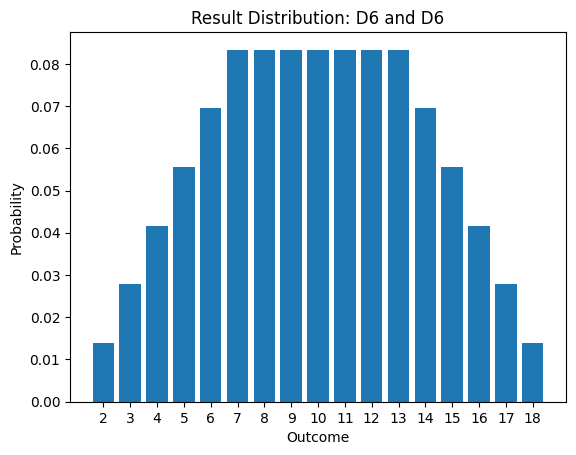

In [73]:
plt.bar(outcomes, dice) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution: D6 and D6') 
plt.xticks(outcomes)


plt.show()

In [68]:
outcomes = np.arange(2, sides1 + sides2 + 1)

sides1 = 12
sides2 = 6

die1 = make_die(sides1)
die2 = make_die(sides2)

dice = add_dist(die1, die2) 

dice

,probs
2,0.013889
3,0.027778
4,0.041667
5,0.055556
6,0.069444
7,0.083333
8,0.083333
9,0.083333
10,0.083333
11,0.083333


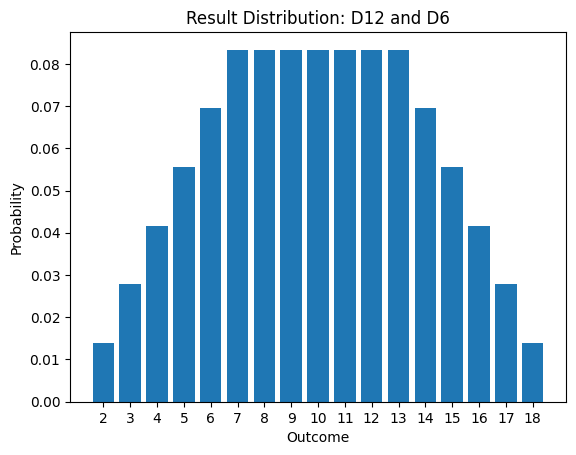

In [72]:
plt.bar(outcomes, dice) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution: D12 and D6') 

# Ensure x-ticks show every unit 
plt.xticks(outcomes)

plt.show()

Pmf provides add_dist, which does the same thing. You can call it as a
method, like this:


In [ ]:
twice = die.add_dist(die)

In [ ]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

sides = 6

die = make_die(sides)


twice = die.add_dist(die)

twice

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


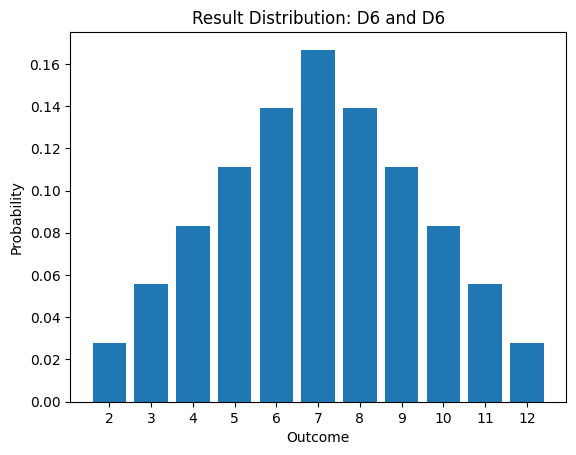

In [86]:
outcomes = np.arange(2, sides*2+1)

plt.bar(outcomes, twice) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution: D6 and D6') 

# Ensure x-ticks show every unit 
plt.xticks(outcomes)

plt.show()

Alternatively: 

In [ ]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

sides1 = 12
sides2 = 6

die1 = make_die(sides1)
die2 = make_die(sides2)


twice = Pmf.add_dist(die1, die2)
twice

,probs
2,0.013889
3,0.027778
4,0.041667
5,0.055556
6,0.069444
7,0.083333
8,0.083333
9,0.083333
10,0.083333
11,0.083333


If we have a sequence of Pmf objects that represent dice, we can compute the
distribution of the sum like this:

In [95]:
def add_dist_seq(seq): # Compute Pmf of the sum of values from seq.
    total = seq[0]
    for n in seq[1:]:
        total = total.add_dist(n)
    return total

As an example, we can make a list of three dice like this:

In [96]:
dice = [die] * 3

And we can compute the distribution of their sum like this:

In [97]:
thrice = add_dist_seq(dice)

In [93]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

sides = 6

die = make_die(sides)
dice = [die] * 3

thrice = add_dist_seq(dice)
thrice

,probs
3,0.004630
4,0.013889
5,0.027778
6,0.046296
7,0.069444
8,0.097222
9,0.115741
10,0.125000
11,0.125000
12,0.115741


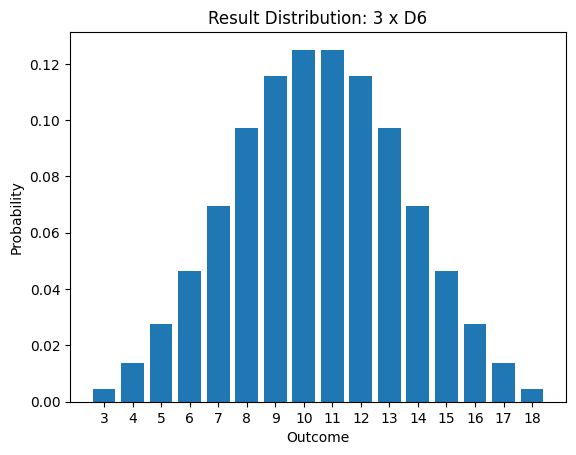

In [98]:
outcomes = np.arange(3, sides*3+1)

plt.bar(outcomes, thrice) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution: 3 x D6') 

# Ensure x-ticks show every unit 
plt.xticks(outcomes)

plt.show()

In summary, 
- The distribution of a single die is uniform from 1 to 6.
- The sum of two dice has a triangle distribution between 2 and 12.
- The sum of three dice has a bell-shaped distribution between 3 and 18.

This example demonstrates __the Central Limit Theorem__, which says
that the distribution of a sum converges on a bell-shaped normal distribution, at
least under some conditions.

## A gluten study

An experiment: 

_A study tested whether people diagnosed with gluten
sensitivity (but not celiac disease) were able to distinguish gluten flour from
non-gluten flour in a blind challenge.
Out of 35 subjects, 12 correctly identified the gluten flour based on resumption
of symptoms while they were eating it. Another 17 wrongly identified the
gluten-free flour based on their symptoms, and 6 were unable to distinguish.
The authors conclude, “Double-blind gluten challenge induces symptom
recurrence in just one-third of patients."_

This conclusion seems odd, because if none of the patients were sensitive
to gluten, we would expect some of them to identify the gluten flour by chance.
So here’s the question: 
- based on this data, how many of the subjects are sensitive
to gluten and how many are guessing?

We can use Bayes’s theorem to answer this question, but first we have to make
some modeling decisions. We’ll assume:

- People who are sensitive to gluten have a 95% chance of correctly
identifying gluten flour under the challenge conditions, and
- People who are not sensitive have a 40% chance of identifying the gluten flour by chance (and a 60% chance of either choosing the other
flour or failing to distinguish).

These particular values are arbitrary, but the results are not sensitive to these
choices.

We  will solve this problem in two steps. 
- First, assuming that we know how many
subjects are sensitive, We will compute the distribution of the data. (__the Forward Problem__)
- Then, using the
likelihood of the data, we will compute the posterior distribution of the number of
sensitive patients (__the Inverse Problem__)

### The forward problem

Suppose we know that 10 of the 35 subjects are sensitive to gluten. That means
that 25 are not:

In [ ]:
total_num = 35
num_sensitive = 10
num_insensitive = total_num - num_sensitive

Each sensitive subject has a 95% chance of identifying the gluten flour, so the
number of correct identifications follows a binomial distribution.
We’ll use make_binomial to make a Pmf that represents the binomial distribution:

In [155]:
from empiricaldist import Pmf
from scipy.stats import binom
import numpy as np 
import matplotlib.pyplot as plt


def make_binomial(n, p): #Make a binomial Pmf
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [156]:
dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.4)

The results are the distributions for the number of correct identifications in each
group.

Now we can use add_dist to compute the distribution of the total number of
correct identifications:

In [157]:
dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

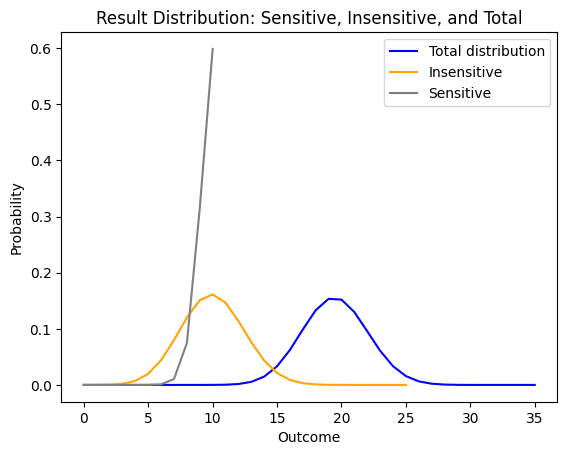

In [162]:
outcomes_sensitive = np.arange(len(dist_sensitive))
outcomes_insensitive = np.arange(len(dist_insensitive))
outcomes_total = np.arange(len(dist_total))

plt.plot(outcomes_total, dist_total, label='Total distribution', color='blue') 
plt.plot(outcomes_insensitive, dist_insensitive, label='Insensitive', color='orange')
plt.plot(outcomes_sensitive, dist_sensitive, label='Sensitive', color='grey') 

plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution: Sensitive, Insensitive, and Total') 

plt.legend()



plt.show()

- We expect most of the sensitive subjects to identify the gluten flour correctly. 
- Of
the 25 insensitive subjects, we expect about 10 to identify the gluten flour by
chance. 
- So we expect about 20 correct identifications in total.

This is the answer to the Forward Problem: given the number of sensitive
subjects, we can compute the distribution of the data.

### The inverse problem

Now let’s solve the Inverse Problem: given the data, we’ll compute the posterior
distribution of the number of sensitive subjects.
- We’ll loop through the possible values of num_sensitive and
compute the distribution of the data for each:

In [270]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from empiricaldist import Pmf 
from scipy.stats import binom

def make_binomial(n, p): #Make a binomial Pmf
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

# Define number of trials 
n = 35


table = pd.DataFrame()

for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)
    table[num_sensitive] = dist_total

 Now we can use the table to compute the likelihood of the data:

In [271]:


likelihood1 = table.loc[12]



- loc selects a row from the DataFrame. The row with index 12 contains the
probability of 12 correct identifications for each hypothetical value of
num_sensitive. And that’s exactly the likelihood we need to do a Bayesian
update.

- we’ll use a uniform prior, which implies that we would be equally surprised by any
value of num_sensitive:

In [272]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

In [273]:
posterior1 = prior * likelihood1
posterior1.normalize()

np.float64(0.47547416486151306)

For comparison, we also compute the posterior for another possible outcome, 20
correct identifications:

In [274]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

np.float64(1.781864976588738)

The following figure shows posterior distributions of num_sensitive based
on the actual data, 12 correct identifications, and the other possible outcome, 20
correct identifications.

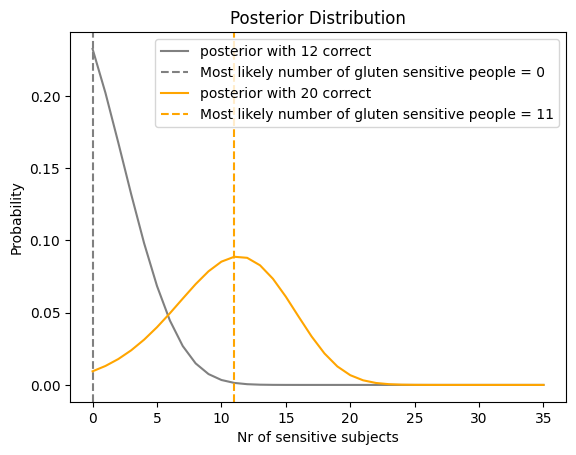

In [282]:
plt.plot(hypos, posterior1, label='posterior with 12 correct', color='grey') 
plt.axvline(posterior1.max_prob(), color='grey', linestyle='--', 
label=f'Most likely number of gluten sensitive people = {posterior1.max_prob()}') 

plt.plot(hypos, posterior2, label='posterior with 20 correct', color='orange')
plt.axvline(posterior2.max_prob(), color='orange', linestyle='--', 
label=f'Most likely number of gluten sensitive people = {posterior2.max_prob()}') 



plt.xlabel('Nr of sensitive subjects') 
plt.ylabel('Probability') 
plt.title('Posterior Distribution') 

plt.legend()



plt.show()

With 12 correct identifications, the most likely conclusion is that none of the
subjects are sensitive to gluten. If there had been 20 correct identifications, the
most likely conclusion would be that 11 of the subjects were sensitive.

In [276]:
posterior1.max_prob()

np.int64(0)

In [277]:
posterior2.max_prob()

np.int64(11)

__In summary__

The findings of the gluten study were:

_Out of 35 subjects, 12 correctly identified the gluten flour based on resumption
of symptoms while they were eating it. Another 17 wrongly identified the
gluten-free flour based on their symptoms, and 6 were unable to distinguish._


The authors conclude, _“Double-blind gluten challenge induces symptom
recurrence in just one-third of patients.”_ 

__As our analysis shows, this conclusion is questionable. With only 12 correct identifications, the most likely number of gluten-sensitive individuals among the 35 participants is probably 0, as positive responses can be attributed to chance.__